## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how="left", on= "Mouse ID")
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
new_df=pd.DataFrame(data_df)
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
new_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
new_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=pd.DataFrame(new_df)
clean_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=True)
no_dupes_df=pd.DataFrame(clean_df)
no_dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
dupecheck=len(no_dupes_df['Mouse ID'].unique())
dupecheck

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_volume_mean= clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
regimen_volume_mean


Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

In [8]:
regimen_volume_median= clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
regimen_volume_median

Drug Regimen
Capomulin    38.125164
Ceftamin     59.851956
Infubinol    60.165180
Ketapril     64.487812
Naftisol     63.283288
Placebo      62.030594
Propriva     55.841410
Ramicane     36.561652
Stelasyn     62.192350
Zoniferol    61.840058
Name: Tumor Volume (mm3), dtype: float64

In [9]:
regimen_volume_var= clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
regimen_volume_var

Drug Regimen
Capomulin     32.663378
Ceftamin      69.982735
Infubinol     74.010875
Ketapril      98.921330
Naftisol     106.029927
Placebo       78.759797
Propriva      69.349002
Ramicane      32.166354
Stelasyn      90.331586
Zoniferol     76.862027
Name: Tumor Volume (mm3), dtype: float64

In [10]:
regimen_volume_std= clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
regimen_volume_std

Drug Regimen
Capomulin     5.715188
Ceftamin      8.365568
Infubinol     8.602957
Ketapril      9.945920
Naftisol     10.297083
Placebo       8.874672
Propriva      8.327605
Ramicane      5.671539
Stelasyn      9.504293
Zoniferol     8.767099
Name: Tumor Volume (mm3), dtype: float64

In [11]:
regimen_volume_sem= clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
regimen_volume_sem

Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.665521
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

table_df = pd.DataFrame({"Tumor Volume-Mean":regimen_volume_mean, "Tumor Volume-Median":regimen_volume_median,"Tumor Volume-Variance":regimen_volume_var, "Tumor Volume-Std":regimen_volume_std,"Tumor Volume-SEM":regimen_volume_sem})

table_df

,Tumor Volume-Mean,Tumor Volume-Median,Tumor Volume-Variance,Tumor Volume-Std,Tumor Volume-SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

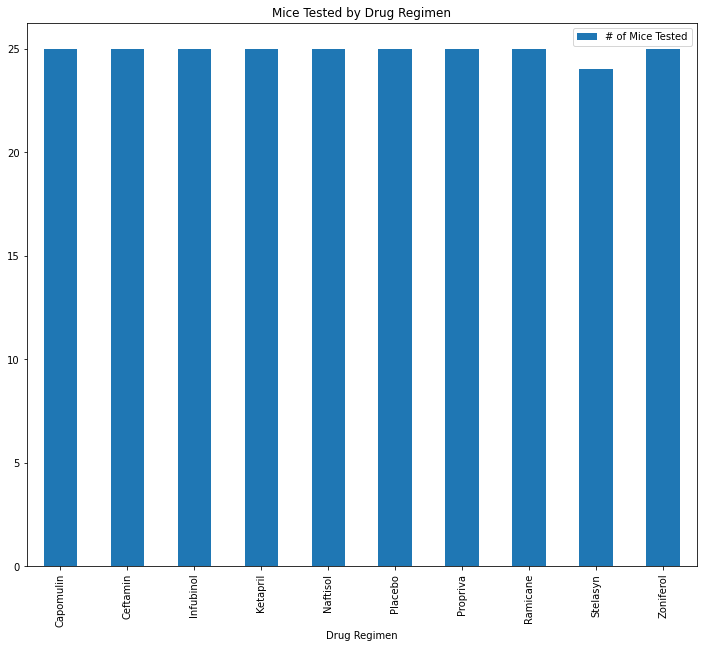

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
data_df_2=pd.DataFrame(clean_df)
mouse_count_unique=data_df_2.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_count_unique_df=pd.DataFrame(mouse_count_unique)
mouse_count_unique_df_1=mouse_count_unique_df.rename(columns={"Mouse ID":"# of Mice Tested"})
mouse_count_unique_df_1.plot(kind="bar",figsize=(12,10))
plt.title("Mice Tested by Drug Regimen")
plt.show()
plt.tight_layout()


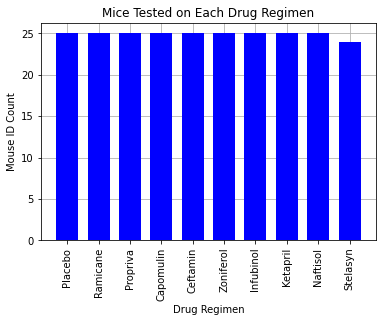

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, color='b', zorder=3)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID Count")
plt.title("Mice Tested on Each Drug Regimen")

plt.grid(zorder=0)

plt.show()


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

len(clean_df[clean_df['Sex'] == 'Male'])

125

In [16]:
len(clean_df[clean_df['Sex'] == 'Female'])

124

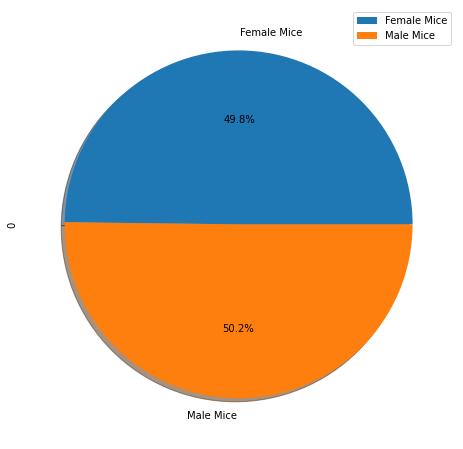

In [17]:
df=pd.DataFrame([124,125], index=['Female Mice', 'Male Mice'])
df.plot(kind='pie', subplots=True,shadow = True,startangle=0, figsize=(8, 8), autopct='%1.1f%%')
plt.show()

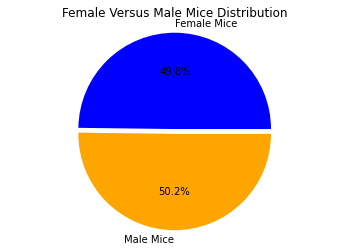

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_versus_male_mice_distribution = [124,125]
my_labels = ['Female Mice','Male Mice']
colors= ["blue","orange"]
explode=(0.05,0)
plt.pie(female_versus_male_mice_distribution,explode=explode,labels=my_labels,colors=colors,autopct='%1.1f%%')
plt.title('Female Versus Male Mice Distribution')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_df = pd.DataFrame(clean_df)

final_tumor = tumor_df.groupby('Mouse ID').max()['Timepoint']
final_tumor_df = pd.DataFrame(final_tumor)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_v_df = pd.merge(final_tumor_df, tumor_df, on=('Mouse ID', 'Timepoint'))

tumor_v_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatments in treatments:
        treatment_df = tumor_v_df.loc[tumor_v_df['Drug Regimen'] == treatments]

        volume = treatment_df['Tumor Volume (mm3)']
        tumor_vol.append(volume)

        quartiles = volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print(f'IQR for {treatments}: {iqr}')

        lower_bound = lowerq - (1.5*iqr)    
        upper_bound = upperq + (1.5*iqr)

        print(f"Lower bound for {treatments}: {lower_bound}.")
        print(f"Upper bound for {treatments}: {upper_bound}.") 

        outliers = (volume.loc[(tumor_v_df['Tumor Volume (mm3)'] >= upper_bound) | (tumor_v_df['Tumor Volume (mm3)'] <= lower_bound)]).count()

        print(f"# of {treatments} outliers: {outliers}\n")
    

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999.
Upper bound for Capomulin: 51.83201549.
# of Capomulin outliers: 0

IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003.
Upper bound for Ramicane: 54.30681135.
# of Ramicane outliers: 0

IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999.
Upper bound for Infubinol: 82.74144559000001.
# of Infubinol outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002.
Upper bound for Ceftamin: 87.66645829999999.
# of Ceftamin outliers: 0



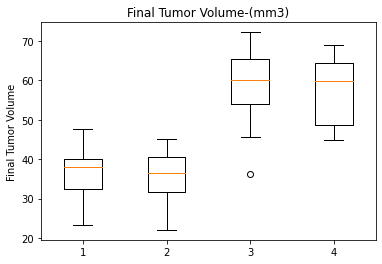

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume-(mm3)')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_vol)
plt.show()



## Line and Scatter Plots

In [22]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
    
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


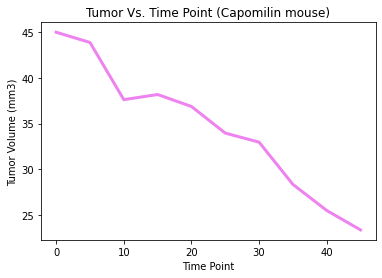

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis=np.arange(0,50,5)
y_axis=[45.000000,43.878496,37.614948,38.177232,36.866876,33.949940,32.959671,28.328531,25.472143,23.343598]
plt.title("Tumor Vs. Time Point (Capomilin mouse)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis,y_axis,color = 'violet', linewidth=3, linestyle='solid')
plt.show()

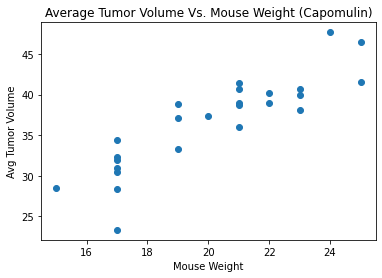

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = capomulin_df.groupby(['Mouse ID'])

avg_tumor = scatter_plot["Tumor Volume (mm3)"].mean()

mouse_weight = scatter_plot["Weight (g)"].mean()

plt.scatter(mouse_weight,avg_tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.title('Average Tumor Volume Vs. Mouse Weight (Capomulin)')

plt.show()

## Correlation and Regression


The correlation coefficient is 0.88
The r-squared is: 0.7686134812139006


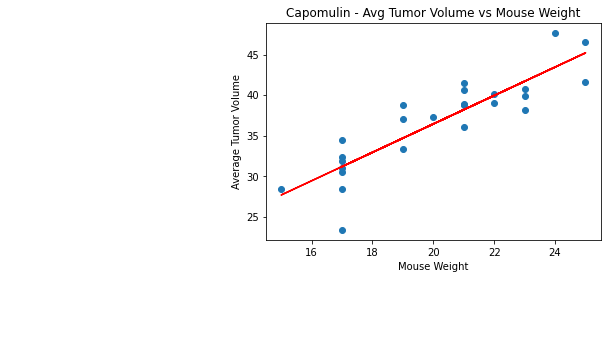

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation coefficient is {round(correlation[0],2)}")
x_values = mouse_weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Capomulin - Avg Tumor Volume vs Mouse Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()